# Análisis de Resultados de Predicción

En esta notebook, analizaremos una muestra de los archivos de predicción generados por la notebook `14.Batch-Prediction-with-Confidence-Intervals.ipynb`.

El objetivo es:
1. Cargar una muestra de los datos de predicción.
2. Realizar un análisis descriptivo de las predicciones y los intervalos de confianza.
3. Visualizar la distribución de los precios predichos y la relación entre la predicción y la amplitud del intervalo.

In [1]:
# Importar librerías
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definir rutas
predictions_dir = '../../data/predictions/'

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Listar los archivos de predicciones y tomar una muestra
prediction_files = [os.path.join(predictions_dir, f) for f in os.listdir(predictions_dir) if f.endswith('.parquet')]

# Tomar una muestra de 5 archivos para el análisis
sample_files = prediction_files[:5]

if sample_files:
    print(f"Se analizarán {len(sample_files)} archivos de muestra.")
    # Cargar los datos de muestra en un único DataFrame
    df_sample = pd.concat([pd.read_parquet(file) for file in sample_files])
    
    print("\nPrimeras filas de los datos de predicción:")
    display(df_sample.head())
else:
    print("No se encontraron archivos de predicción para analizar.")

Se analizarán 5 archivos de muestra.

Primeras filas de los datos de predicción:


,ENTIDAD,NOM_ENT,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,...,longitud_escuelas_publicas,dist_m_escuelas_publicas,estacionamiento,lote_m2,es_amueblado,es_penthouse,prediction,prediction_bin,lower_bound,upper_bound
0,9,Ciudad de México,GUSTAVO A. MADERO,1,Gustavo A. Madero,3055,32,123,63,60,...,-99.090449,65.079861,1,119.0,0,0,23287.316406,3.0,14820.187913,31571.384691
1,9,Ciudad de México,GUSTAVO A. MADERO,1,Gustavo A. Madero,3055,35,143,68,75,...,-99.090449,71.351133,1,121.0,0,0,35498.253906,6.0,21644.514458,51955.166323
2,9,Ciudad de México,GUSTAVO A. MADERO,1,Gustavo A. Madero,3055,32,123,63,60,...,-99.090449,65.079861,0,108.0,0,0,17369.582031,1.0,9215.872042,24095.728017
3,9,Ciudad de México,GUSTAVO A. MADERO,1,Gustavo A. Madero,3055,32,123,63,60,...,-99.090449,38.015404,1,106.0,0,0,24009.046875,3.0,15279.501515,32549.858547
4,9,Ciudad de México,GUSTAVO A. MADERO,1,Gustavo A. Madero,3055,32,123,63,60,...,-99.090449,38.015404,1,145.0,0,0,36870.148438,6.0,22481.006053,53963.068141


In [3]:
df_sample = df_sample.drop_duplicates()
df_sample.reset_index(drop=True, inplace=True)

In [4]:
# Análisis Descriptivo
if 'df_sample' in locals() and not df_sample.empty:
    print("Estadísticas descriptivas de las predicciones:")
    display(df_sample[['prediction', 'lower_bound', 'upper_bound']].describe().apply(lambda s: s.apply('{:,.2f}'.format)))
    
    # Calcular la amplitud del intervalo de confianza
    df_sample['interval_width'] = df_sample['upper_bound'] - df_sample['lower_bound']
    print("\nEstadísticas de la amplitud del intervalo de confianza:")
    display(df_sample['interval_width'].describe().apply('{:,.2f}'.format))

Estadísticas descriptivas de las predicciones:


,prediction,lower_bound,upper_bound
count,"7,098.00","7,098.00","7,098.00"
mean,"16,670.03","9,442.37","25,289.48"
std,"8,943.35","6,122.98","11,431.39"
min,156.77,75.06,280.44
25%,"9,602.62","4,597.59","17,177.33"
50%,"15,830.38","8,399.21","23,982.21"
75%,"21,370.33","12,918.55","31,267.21"
max,"69,293.31","40,122.22","93,986.22"



Estadísticas de la amplitud del intervalo de confianza:


count     7,098.00
mean     15,847.10
std       5,622.33
min         205.38
25%      12,579.74
50%      15,827.77
75%      18,183.75
max      53,864.00
Name: interval_width, dtype: object

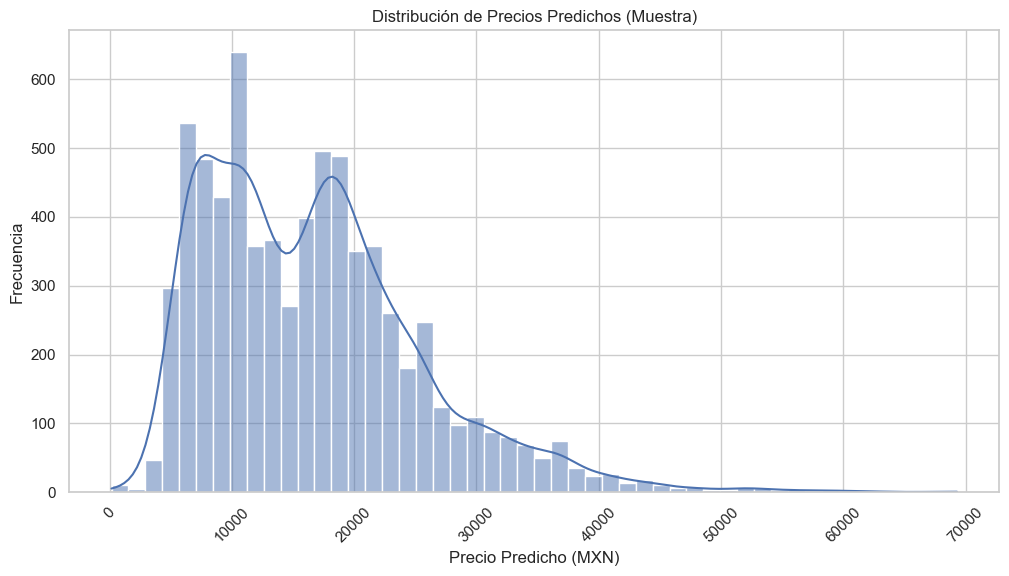

In [5]:
# Visualización de las predicciones
if 'df_sample' in locals() and not df_sample.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_sample['prediction'], bins=50, kde=True)
    plt.title('Distribución de Precios Predichos (Muestra)')
    plt.xlabel('Precio Predicho (MXN)')
    plt.ylabel('Frecuencia')
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation=45)
    plt.show()

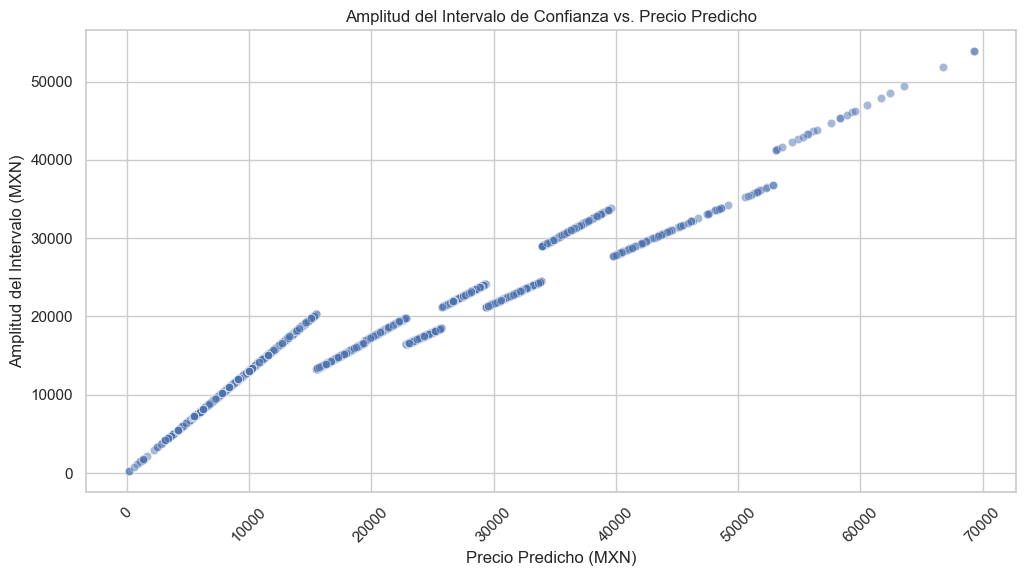

In [6]:
# Visualización de la relación entre predicción y amplitud del intervalo
if 'df_sample' in locals() and not df_sample.empty:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_sample, x='prediction', y='interval_width', alpha=0.5)
    plt.title('Amplitud del Intervalo de Confianza vs. Precio Predicho')
    plt.xlabel('Precio Predicho (MXN)')
    plt.ylabel('Amplitud del Intervalo (MXN)')
    plt.ticklabel_format(style='plain', axis='both')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
df_sample[df_sample.prediction == df_sample.prediction.min()]

,ENTIDAD,NOM_ENT,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,...,dist_m_escuelas_publicas,estacionamiento,lote_m2,es_amueblado,es_penthouse,prediction,prediction_bin,lower_bound,upper_bound,interval_width
4498,9,Ciudad de México,AZCAPOTZALCO,1,Azcapotzalco,0720,22,105,52,53,...,279.132321,1,497.85,0,0,156.772705,0.0,75.060432,280.437717,205.377285


In [12]:
df_sample[df_sample.prediction == 0]

,ENTIDAD,NOM_ENT,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,...,dist_m_escuelas_publicas,estacionamiento,lote_m2,es_amueblado,es_penthouse,prediction,prediction_bin,lower_bound,upper_bound,interval_width


In [13]:
df_sample[df_sample.prediction == None]

,ENTIDAD,NOM_ENT,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,...,dist_m_escuelas_publicas,estacionamiento,lote_m2,es_amueblado,es_penthouse,prediction,prediction_bin,lower_bound,upper_bound,interval_width


In [15]:
df_sample[df_sample.prediction.isnull()].shape

(42, 246)

In [16]:

df_sample.shape

(7140, 246)

In [19]:
42*100/7140

0.5882352941176471